In [2]:
%matplotlib notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import _gpp

data_path = "../data"
dataset = np.load(os.path.join(data_path, 'pendulum_v0_imgs.npz'))
data_details = pd.read_pickle(os.path.join(data_path, 'pendulum_v0_details.pkl'))
data_latent = np.load(os.path.join(data_path, 'pendulum_v0_latent_kl2rl1-z6-b100.npz'))['arr_0']

In [3]:
raw_obs = np.array(data_details['raw_obs'].tolist())
x, y = raw_obs[:, :2].T

In [4]:
data_details

,episode,image_index,pendulum_length,pendulum_mass,raw_action,raw_obs,reward,step
0,0,0,1.257675,1.396678,[0.0],"[-0.2934452649406187, 0.955975876517776, -0.28...",-3.499721,0
1,0,1,1.257675,1.396678,[0.4110535],"[-0.3162528337380962, 0.9486749417754345, 0.47...",-3.604943,1
2,0,2,1.257675,1.396678,[0.17953274],"[-0.37302253140839425, 0.9278222842019228, 1.2...",-3.960829,2
3,0,3,1.257675,1.396678,[-0.3053808],"[-0.4581436152391949, 0.8888781850262502, 1.87...",-4.539828,3
4,0,4,1.257675,1.396678,[0.58357644],"[-0.5695952580252172, 0.8219253263132766, 2.60...",-5.415962,4
5,0,5,1.257675,1.396678,[-0.24965115],"[-0.6929716263338626, 0.7209648570465842, 3.19...",-6.477573,5
6,0,6,1.257675,1.396678,[1.5670921],"[-0.8195603330449615, 0.572992897424769, 3.900...",-7.932276,6
7,0,7,1.257675,1.396678,[1.8546511],"[-0.9272986273046441, 0.37432239553481556, 4.5...",-9.661456,7
8,0,8,1.257675,1.396678,[-0.46623394],"[-0.9894124500982655, 0.14513098769920701, 4.7...",-11.242069,8
9,0,9,1.257675,1.396678,[1.1669002],"[-0.9945881751644238, -0.10389591822156204, 4....",-11.722407,9


In [5]:
thetas = np.arctan2(y, x)
rewards = np.array(data_details['reward'])
pendulum_mass = np.array(data_details['pendulum_mass'])
pendulum_length = np.array(data_details['pendulum_length'])
actions = np.array(data_details['raw_action'].tolist())

In [6]:
actions

array([[ 0.        ],
       [ 0.4110535 ],
       [ 0.17953274],
       ...,
       [-1.5210258 ],
       [-0.9810532 ],
       [ 1.3136857 ]], dtype=float32)

In [7]:
def angle_normalize(x):
    return np.fmod(x + np.pi, 2*np.pi) - np.pi

In [8]:
selected_idx = [2, 4, 5]
selected_latent = data_latent.reshape(len(raw_obs), -1)[:, selected_idx]

In [9]:
foo = np.concatenate([thetas.reshape(-1, 1), x.reshape(-1, 1), y.reshape(-1, 1), rewards.reshape(-1, 1), actions, data_latent.reshape(len(raw_obs), -1)], axis=1)
foo = pd.DataFrame(foo, columns=('theta', 'y', 'x', 'rewards', 'actions', 'z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5'))
foo

,theta,y,x,rewards,actions,z_0,z_1,z_2,z_3,z_4,z_5
0,1.868625,-0.293445,0.955976,-3.499721,0.000000,-1.110664,-0.235117,-2.275965,1.017740,0.756314,-0.111232
1,1.892573,-0.316253,0.948675,-3.604943,0.411054,2.031200,0.848054,-2.296019,0.119952,-1.232879,-0.114479
2,1.953061,-0.373023,0.927822,-3.960829,0.179533,-0.911096,0.971694,-2.164225,-0.613819,-1.110937,-0.235363
3,2.046702,-0.458144,0.888878,-4.539828,-0.305381,1.268697,0.003526,-2.106858,0.534819,-1.259176,-0.426444
4,2.176810,-0.569595,0.821925,-5.415962,0.583576,0.246391,-0.584006,-1.863585,1.255274,-1.016348,-0.628818
5,2.336399,-0.692972,0.720965,-6.477573,-0.249651,-0.077283,1.941471,-1.661291,1.368833,-1.095649,-0.907334
6,2.531440,-0.819560,0.572993,-7.932276,1.567092,1.402149,-0.014090,-1.442459,2.460960,-0.043828,-1.251124
7,2.757927,-0.927299,0.374322,-9.661456,1.854651,-0.924540,-0.819793,-1.044047,-1.299220,0.992399,-1.771260
8,2.995947,-0.989412,0.145131,-11.242069,-0.466234,-1.059472,0.121774,-0.520577,0.164422,-1.388684,-2.270768
9,-3.037509,-0.994588,-0.103896,-11.722407,1.166900,1.263611,1.249524,0.332348,0.193123,-0.879948,-1.936894


<IPython.core.display.Javascript object>


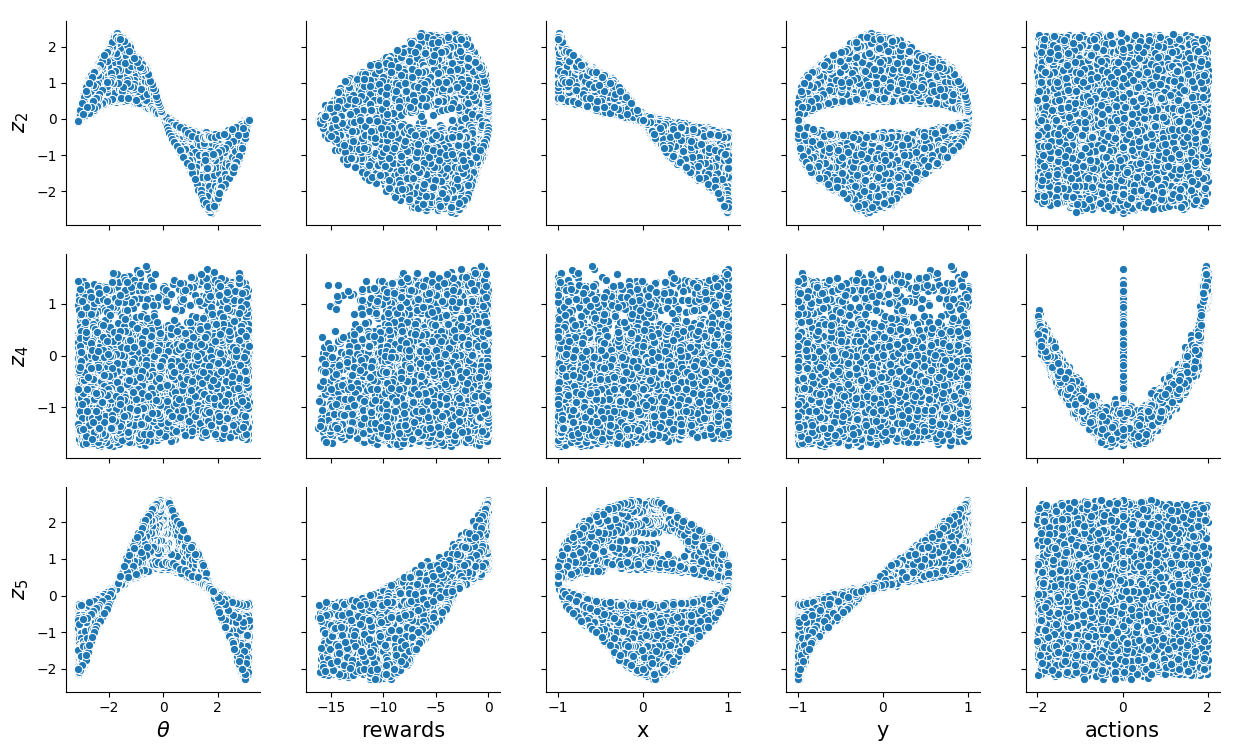

In [82]:
# sns.reset_orig()
grid = sns.pairplot(foo, plot_kws=dict(rasterized=True), x_vars=('theta','rewards', 'x', 'y', 'actions'), y_vars=( 'z_2', 'z_4', 'z_5'))
grid.axes[2, 0].set_ylabel(r'$z_5$')
grid.axes[1, 0].set_ylabel(r'$z_4$')
grid.axes[0, 0].set_ylabel(r'$z_2$')
grid.axes[2, 0].set_xlabel(r'$\theta$')
for ax in grid.axes.ravel():
    fontsize = 15
    ax.set_xlabel(ax.get_xlabel(), fontsize=fontsize)
    ax.set_ylabel(ax.get_ylabel(), fontsize=fontsize)
plt.savefig('disent_multiplot_raster.pdf', bbox_inches='tight', dpi=170)

<IPython.core.display.Javascript object>


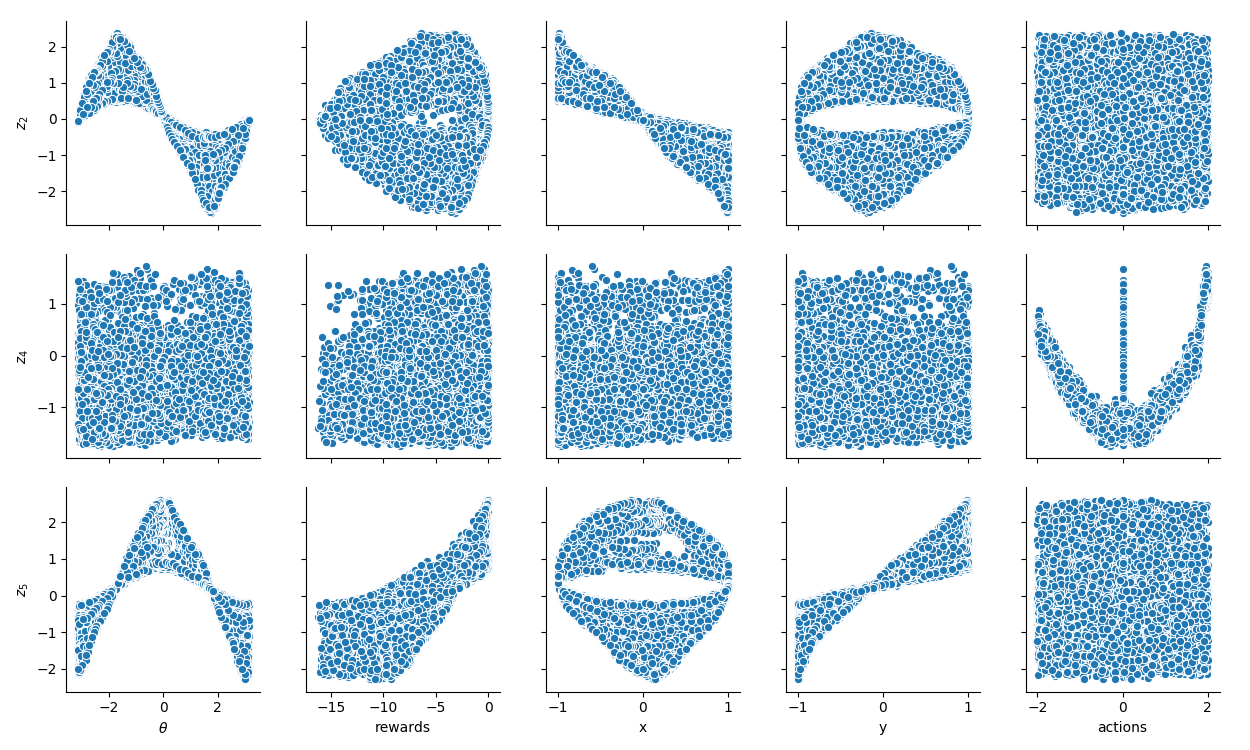

In [29]:
grid.fig

<IPython.core.display.Javascript object>


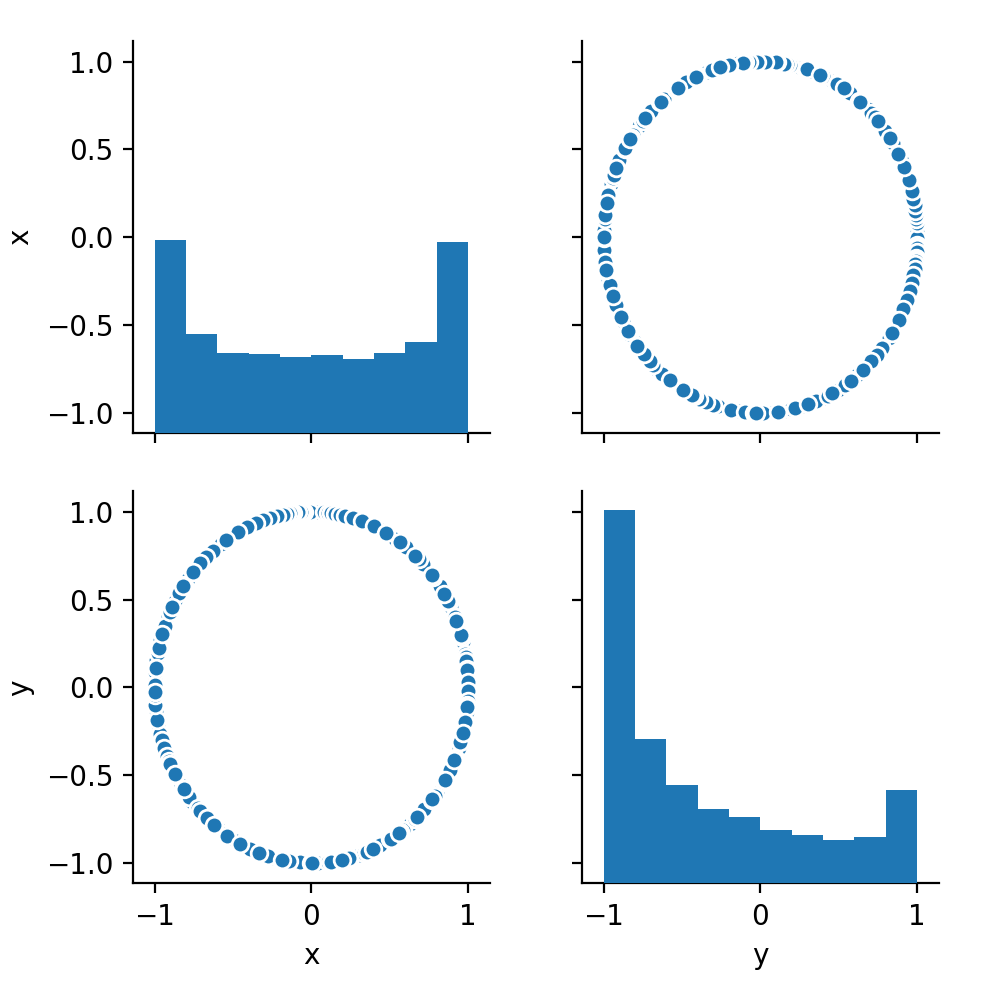

In [16]:
sns.pairplot(foo, vars=('x', 'y'))

In [17]:
bar = np.concatenate([pendulum_mass.reshape(-1, 1), pendulum_length.reshape(-1, 1), data_latent.reshape(len(raw_obs), -1)], axis=1)
bar = pd.DataFrame(bar, columns=('pendulum_mass', 'pendulum_length', 'z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5'))

<IPython.core.display.Javascript object>


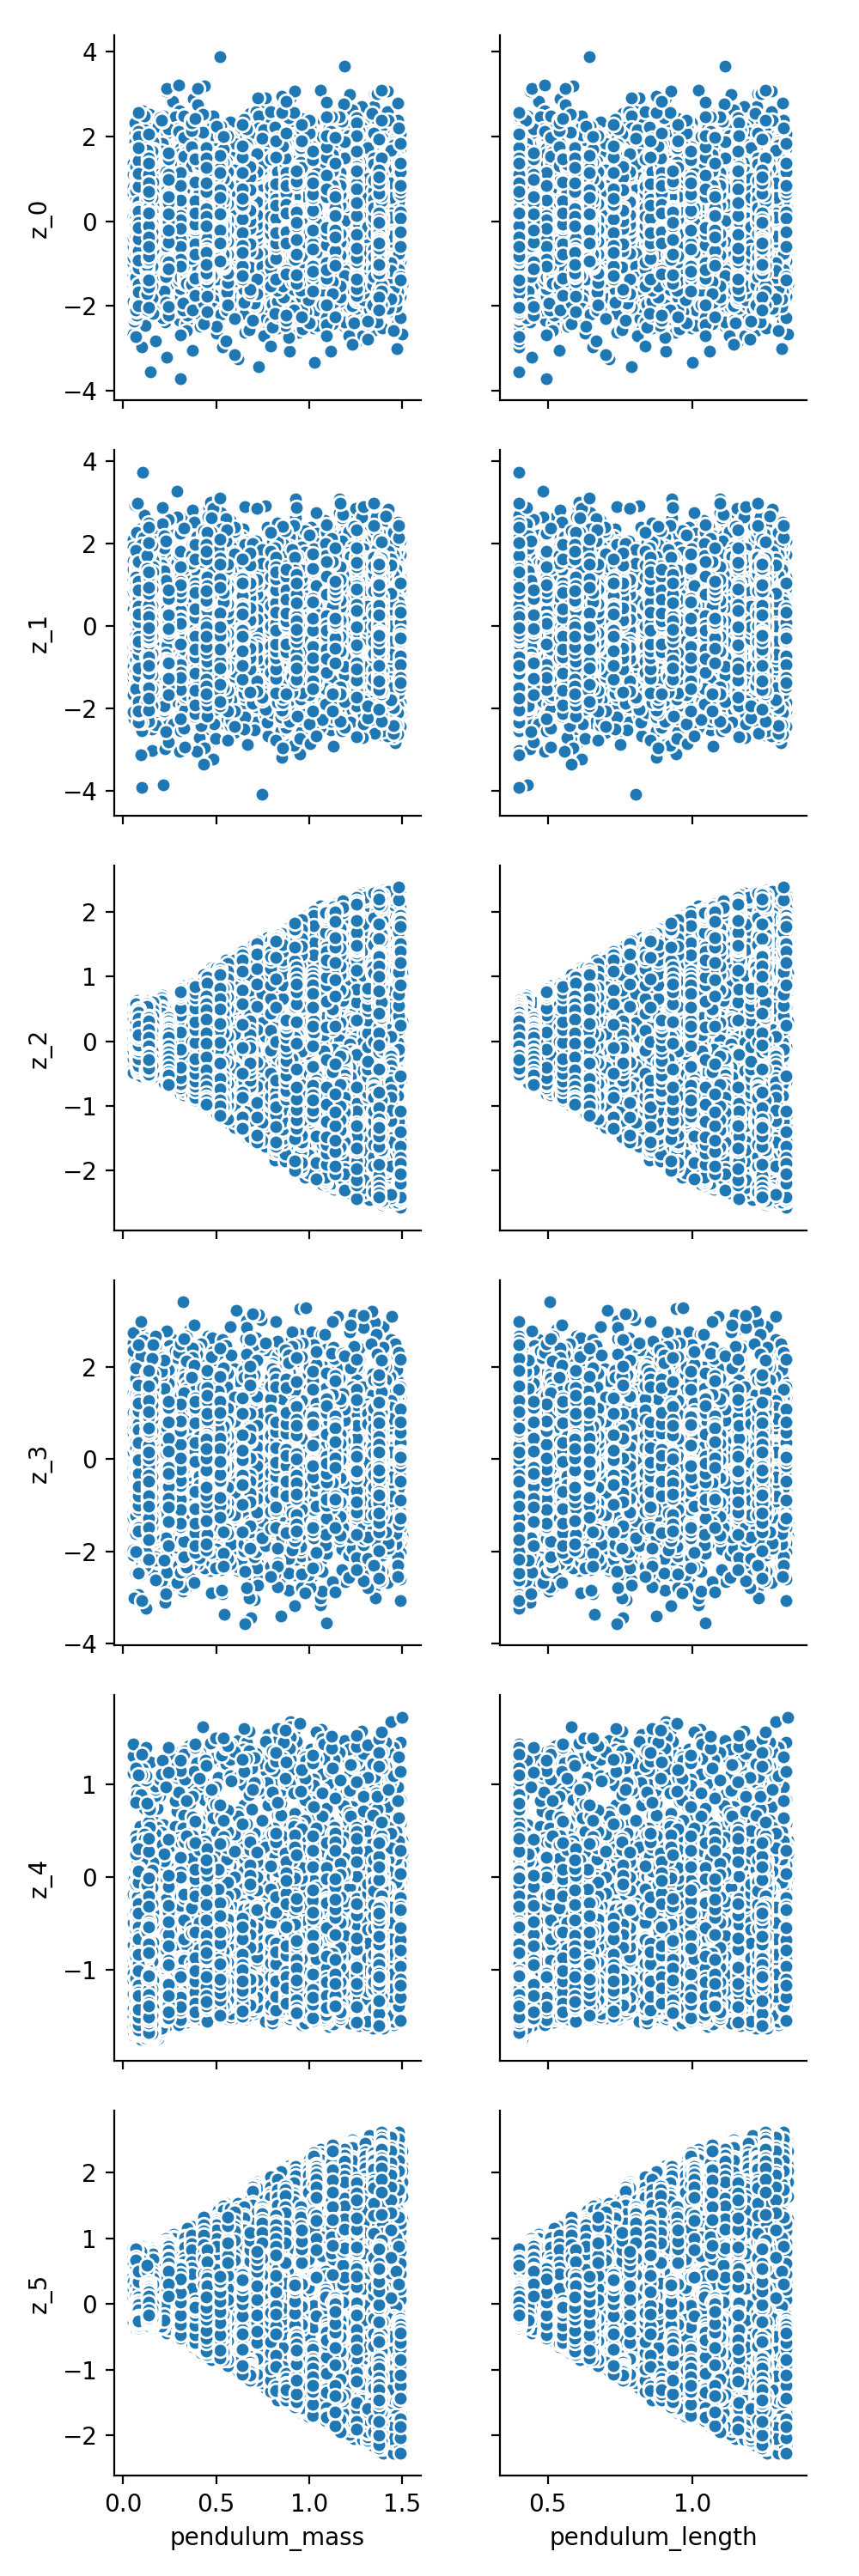

In [18]:
sns.pairplot(bar, x_vars=('pendulum_mass', 'pendulum_length'), y_vars=('z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5'))

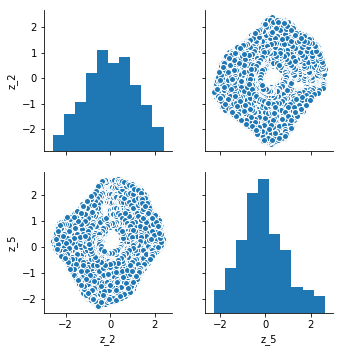

In [37]:
sns.pairplot(bar, vars=( 'z_2', 'z_5'))

In [21]:
angle_normalize(thetas).reshape(-1, 1)

array([[1.86862511],
       [1.89257331],
       [1.95306088],
       ...,
       [1.99661227],
       [1.88568225],
       [1.83245328]])

In [22]:
thetas

array([1.86862511, 1.89257331, 1.95306088, ..., 1.99661227, 1.88568225,
       1.83245328])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


'\nplt.plot(angle_normalize(thetas)**2)\nplt.show()\nprint(angle_normalize(thetas)**2)\n'

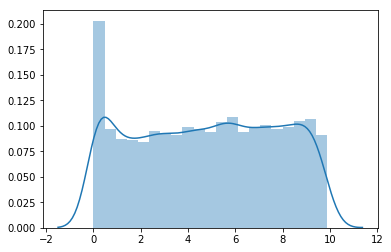

In [36]:
%matplotlib inline
sns.distplot(angle_normalize(thetas)**2)
"""
plt.plot(angle_normalize(thetas)**2)
plt.show()
print(angle_normalize(thetas)**2)
"""

In [26]:
sns.distplot(rewards)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
